   ## Exploratory Data Analysis on Alcoholic Beverage Sector

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
#Reading the file
df = pd.read_csv("winequality.csv")

In [22]:
#shape of the dataframe
df.shape

(6497, 14)

In [23]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  good color  
0      9.4        5     0   red  
1      9.8        5     0   red  
2      9.8        5     0   red  
3      9.8        6     0   red  
4      9.4        5     0   red

In [24]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  good  color  
6492     11.2        6     0  white  
6493      9.6        5     0  white  
6494      9.4        6     0  white  
6495     12.8        7     1  white  
6496     11.8        6     0  white

In [25]:
#columns of the dataframe
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

In [26]:
#renaming column names
col_name = [col.replace(" ","_") for col in df.columns]
df.columns=col_name

In [27]:
#checking duplicate values in the dataframe
df.duplicated().sum()

1177

In [28]:
#dropping the duplicates from dataframe
df.drop_duplicates().shape

(5320, 14)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [30]:
#data type of columns
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
good                      int64
color                    object
dtype: object

In [31]:
df.tail()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  good  color  
6492     11.2        6     0  white  
6493      9.6        5     0  white  
6494      9.4        6     0  white  
6495     12.8        7     1  white  
6496     11.8        6     0  white

In [32]:
#checking the missing values
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

In [33]:
df["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [34]:
df["good"].value_counts()

good
0    5220
1    1277
Name: count, dtype: int64

In [35]:
#typecasting discrete numerical column to object type
df["quality"]=df["quality"].astype("object")
df["good"]=df["good"].astype("object")

In [36]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
good                     object
color                    object
dtype: object

In [37]:
#separating numerical and discrete columns
num_df = df.select_dtypes(include=["float64"])
discrete_df = df.select_dtypes(include=["object"])

In [38]:
def discrete_univariate_analysis(discrete_data):
    for col in discrete_data:
        print("*"*10,col,"*"*10)
        print(discrete_data[col].agg(["count","nunique","unique"]))
        print("Value Count:\n",discrete_data[col].value_counts())
        print()
        
def numerical_univariate_analysis(num_data):
    for col in num_data:
        print("*"*10,col,"*"*10)
        print(num_data[col].agg(["min","max","mean","median","std","skew","kurt"]))
        print()

In [39]:
def continous_distribution_plot(data):
    fig,axs = plt.subplots(1,3,figsize=(8,3),constrained_layout=True)
    fig.suptitle("Continous Distribution Plot")
    
    axs[0].set_title("Histogram plot")
    sns.histplot(data,ax = axs[0])
    
    axs[1].set_title("KDE Plot")
    sns.kdeplot(data,ax=axs[1])
    
    axs[2].set_title("Box PLot")
    sns.boxplot(data,ax=axs[2])
    
    plt.show()

## Univariate Non Statistical Visual Analysis - Categorical Column

In [40]:
discrete_univariate_analysis(discrete_df)

********** quality **********
count                       6497
nunique                        7
unique     [5, 6, 7, 4, 8, 3, 9]
Name: quality, dtype: object
Value Count:
 quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

********** good **********
count        6497
nunique         2
unique     [0, 1]
Name: good, dtype: object
Value Count:
 good
0    5220
1    1277
Name: count, dtype: int64

********** color **********
count              6497
nunique               2
unique     [red, white]
Name: color, dtype: object
Value Count:
 color
white    4898
red      1599
Name: count, dtype: int64



## Univariate visual Analysis - Categorical Column

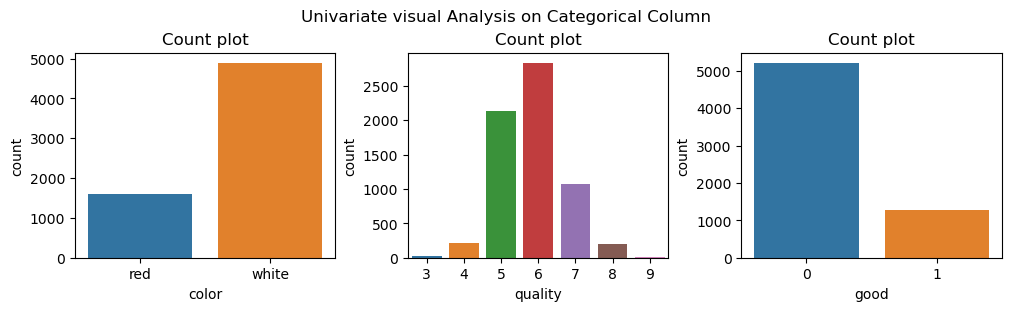

In [41]:
fig,axs = plt.subplots(1,3,figsize=(10,3),layout="constrained")
fig.suptitle("Univariate visual Analysis on Categorical Column")

axs[0].set_title("Count plot")
sns.countplot(data=df,x="color",ax=axs[0])

axs[1].set_title("Count plot")
sns.countplot(data=df,x="quality",ax=axs[1])

axs[2].set_title("Count plot")
sns.countplot(data=df,x="good",ax=axs[2])

plt.show()

## Univariate Non visual Statistical Analysis - Numerical column

In [42]:
numerical_univariate_analysis(num_df)

********** fixed_acidity **********
min        3.800000
max       15.900000
mean       7.215307
median     7.000000
std        1.296434
skew       1.723290
kurt       5.061161
Name: fixed_acidity, dtype: float64

********** volatile_acidity **********
min       0.080000
max       1.580000
mean      0.339666
median    0.290000
std       0.164636
skew      1.495097
kurt      2.825372
Name: volatile_acidity, dtype: float64

********** citric_acid **********
min       0.000000
max       1.660000
mean      0.318633
median    0.310000
std       0.145318
skew      0.471731
kurt      2.397239
Name: citric_acid, dtype: float64

********** residual_sugar **********
min        0.600000
max       65.800000
mean       5.443235
median     3.000000
std        4.757804
skew       1.435404
kurt       4.359272
Name: residual_sugar, dtype: float64

********** chlorides **********
min        0.009000
max        0.611000
mean       0.056034
median     0.047000
std        0.035034
skew       5.399828
kurt  

<Axes: title={'center': 'Kde plot'}, xlabel='alcohol', ylabel='Density'>

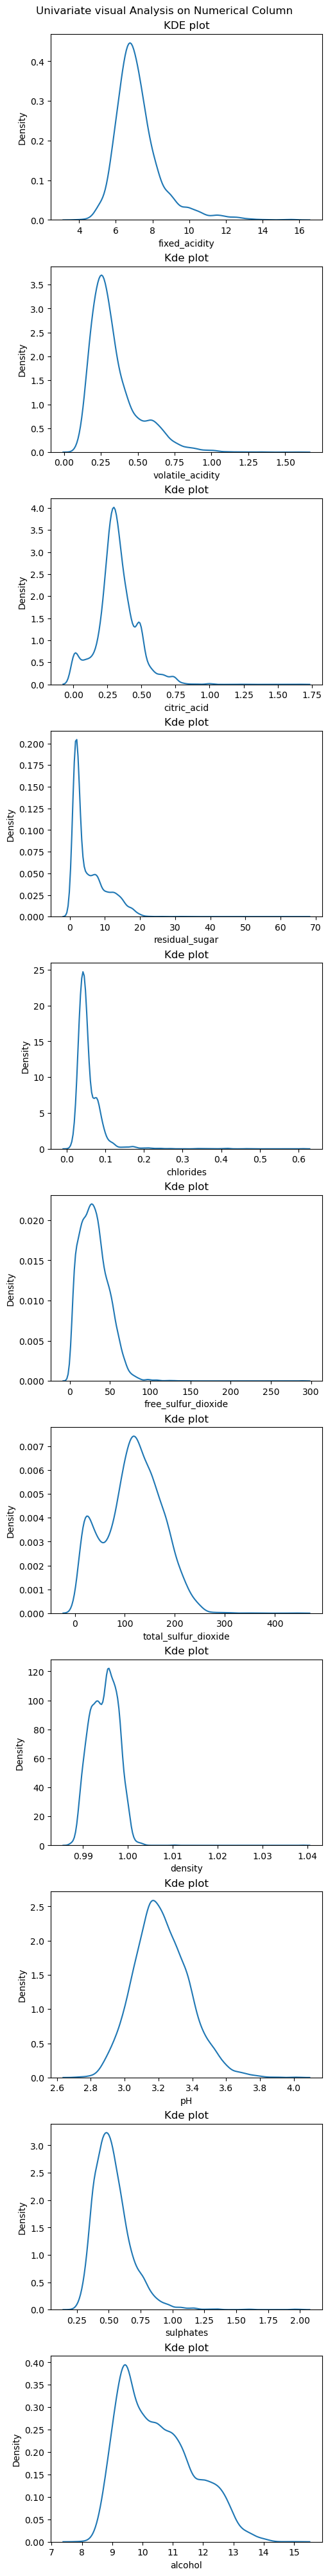

In [43]:
fig,axs = plt.subplots(11,1,figsize=(5,40),layout="constrained")
fig.suptitle("Univariate visual Analysis on Numerical Column")

x = ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol"]
axs[0].set_title("KDE plot")
sns.kdeplot(data=df,x="fixed_acidity",ax=axs[0])
axs[1].set_title("Kde plot")
sns.kdeplot(data=df,x="volatile_acidity",ax=axs[1])
axs[2].set_title("Kde plot")
sns.kdeplot(data=df,x="citric_acid",ax=axs[2])
axs[3].set_title("Kde plot")
sns.kdeplot(data=df,x="residual_sugar",ax=axs[3])
axs[4].set_title("Kde plot")
sns.kdeplot(data=df,x="chlorides",ax=axs[4])
axs[5].set_title("Kde plot")
sns.kdeplot(data=df,x="free_sulfur_dioxide",ax=axs[5])
axs[6].set_title("Kde plot")
sns.kdeplot(data=df,x="total_sulfur_dioxide",ax=axs[6])
axs[7].set_title("Kde plot")
sns.kdeplot(data=df,x="density",ax=axs[7])
axs[8].set_title("Kde plot")
sns.kdeplot(data=df,x="pH",ax=axs[8])
axs[9].set_title("Kde plot")
sns.kdeplot(data=df,x="sulphates",ax=axs[9])
axs[10].set_title("Kde plot")
sns.kdeplot(data=df,x="alcohol",ax=axs[10])

## Univariate Visual Analysis - Numerical Column

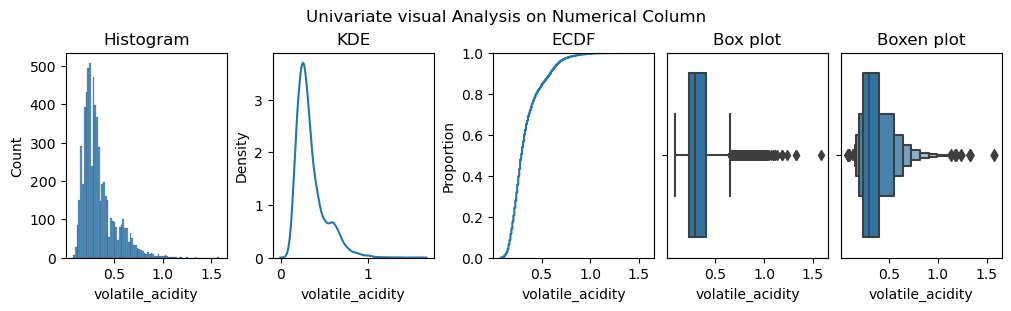

In [44]:
fig,axs = plt.subplots(1,5,figsize=(10,3),layout="constrained")
fig.suptitle("Univariate visual Analysis on Numerical Column")

axs[0].set_title("Histogram")
sns.histplot(data=df,x="volatile_acidity",ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df,x="volatile_acidity",ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df,x="volatile_acidity",ax=axs[2])

axs[3].set_title("Box plot")
sns.boxplot(data=df,x="volatile_acidity",ax=axs[3])

axs[4].set_title("Boxen plot")
sns.boxenplot(data=df,x="volatile_acidity",ax=axs[4])

plt.show()

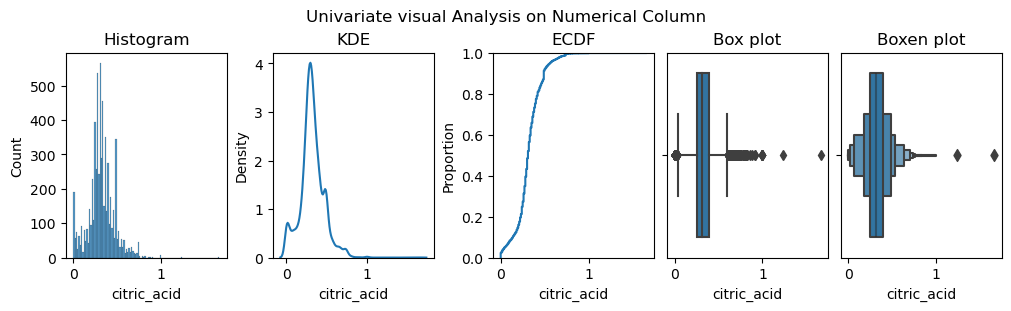

In [45]:
fig,axs = plt.subplots(1,5,figsize=(10,3),layout="constrained")
fig.suptitle("Univariate visual Analysis on Numerical Column")

axs[0].set_title("Histogram")
sns.histplot(data=df,x="citric_acid",ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df,x="citric_acid",ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df,x="citric_acid",ax=axs[2])

axs[3].set_title("Box plot")
sns.boxplot(data=df,x="citric_acid",ax=axs[3])

axs[4].set_title("Boxen plot")
sns.boxenplot(data=df,x="citric_acid",ax=axs[4])

plt.show()

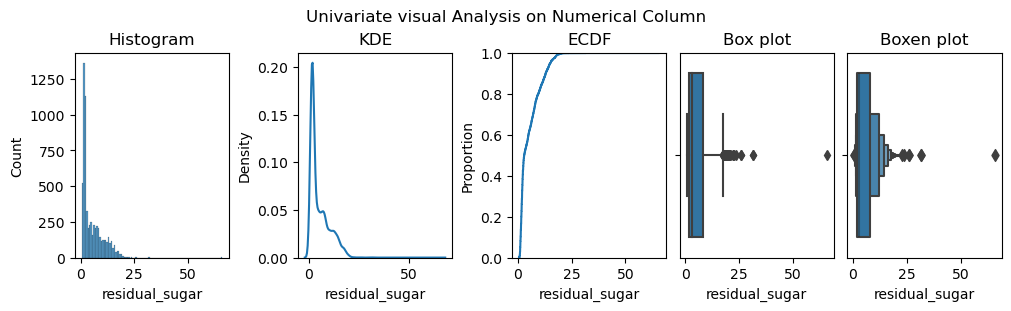

In [46]:
fig,axs = plt.subplots(1,5,figsize=(10,3),layout="constrained")
fig.suptitle("Univariate visual Analysis on Numerical Column")

axs[0].set_title("Histogram")
sns.histplot(data=df,x="residual_sugar",ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df,x="residual_sugar",ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df,x="residual_sugar",ax=axs[2])

axs[3].set_title("Box plot")
sns.boxplot(data=df,x="residual_sugar",ax=axs[3])

axs[4].set_title("Boxen plot")
sns.boxenplot(data=df,x="residual_sugar",ax=axs[4])

plt.show()

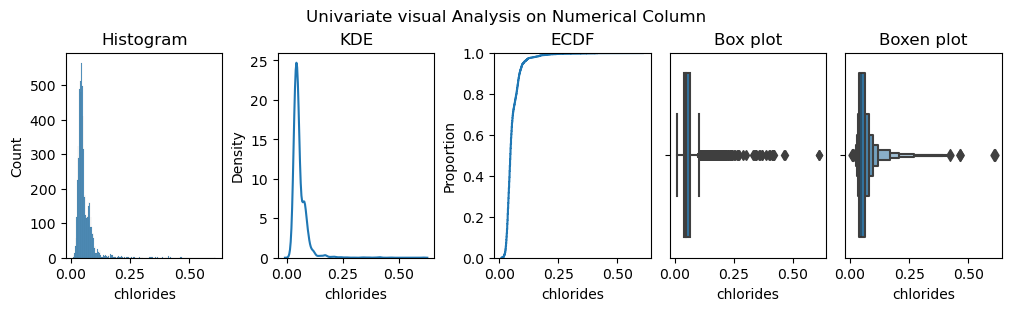

In [47]:
fig,axs = plt.subplots(1,5,figsize=(10,3),layout="constrained")
fig.suptitle("Univariate visual Analysis on Numerical Column")

axs[0].set_title("Histogram")
sns.histplot(data=df,x="chlorides",ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df,x="chlorides",ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df,x="chlorides",ax=axs[2])

axs[3].set_title("Box plot")
sns.boxplot(data=df,x="chlorides",ax=axs[3])

axs[4].set_title("Boxen plot")
sns.boxenplot(data=df,x="chlorides",ax=axs[4])

plt.show()

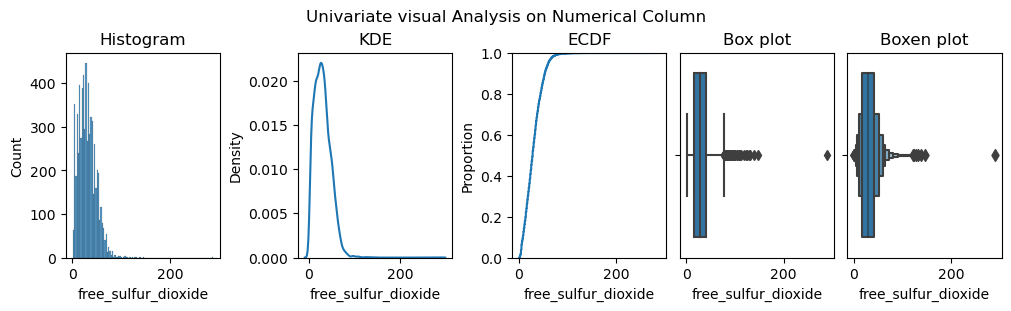

In [48]:
fig,axs = plt.subplots(1,5,figsize=(10,3),layout="constrained")
fig.suptitle("Univariate visual Analysis on Numerical Column")

axs[0].set_title("Histogram")
sns.histplot(data=df,x="free_sulfur_dioxide",ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df,x="free_sulfur_dioxide",ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df,x="free_sulfur_dioxide",ax=axs[2])

axs[3].set_title("Box plot")
sns.boxplot(data=df,x="free_sulfur_dioxide",ax=axs[3])

axs[4].set_title("Boxen plot")
sns.boxenplot(data=df,x="free_sulfur_dioxide",ax=axs[4])

plt.show()

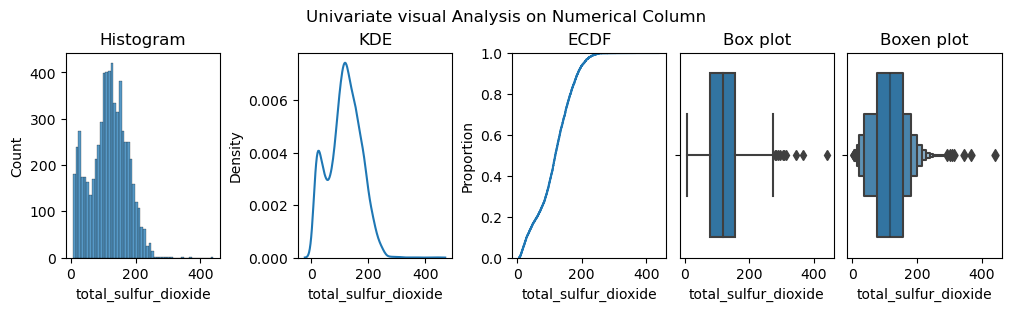

In [49]:
fig,axs = plt.subplots(1,5,figsize=(10,3),layout="constrained")
fig.suptitle("Univariate visual Analysis on Numerical Column")

axs[0].set_title("Histogram")
sns.histplot(data=df,x="total_sulfur_dioxide",ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df,x="total_sulfur_dioxide",ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df,x="total_sulfur_dioxide",ax=axs[2])

axs[3].set_title("Box plot")
sns.boxplot(data=df,x="total_sulfur_dioxide",ax=axs[3])

axs[4].set_title("Boxen plot")
sns.boxenplot(data=df,x="total_sulfur_dioxide",ax=axs[4])

plt.show()

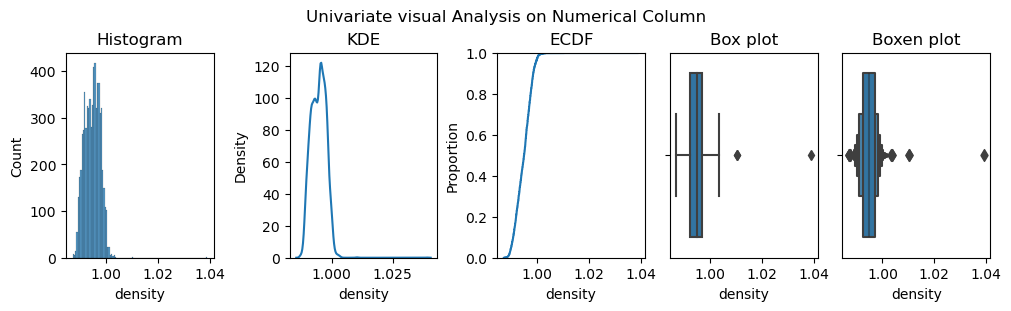

In [50]:
fig,axs = plt.subplots(1,5,figsize=(10,3),layout="constrained")
fig.suptitle("Univariate visual Analysis on Numerical Column")

axs[0].set_title("Histogram")
sns.histplot(data=df,x="density",ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df,x="density",ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df,x="density",ax=axs[2])

axs[3].set_title("Box plot")
sns.boxplot(data=df,x="density",ax=axs[3])

axs[4].set_title("Boxen plot")
sns.boxenplot(data=df,x="density",ax=axs[4])

plt.show()

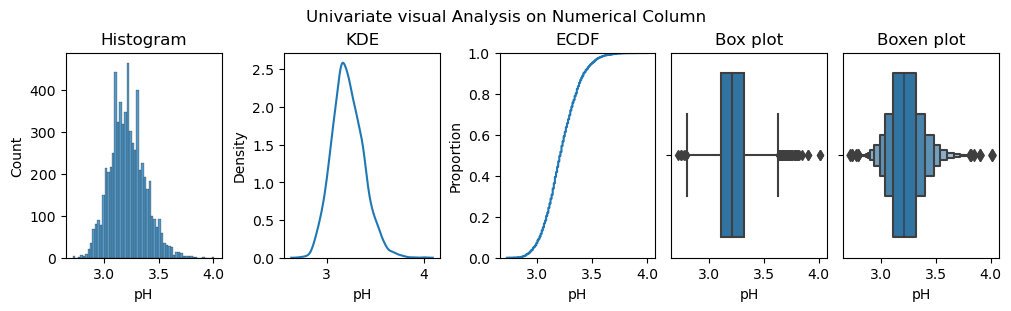

In [51]:
fig,axs = plt.subplots(1,5,figsize=(10,3),layout="constrained")
fig.suptitle("Univariate visual Analysis on Numerical Column")

axs[0].set_title("Histogram")
sns.histplot(data=df,x="pH",ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df,x="pH",ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df,x="pH",ax=axs[2])

axs[3].set_title("Box plot")
sns.boxplot(data=df,x="pH",ax=axs[3])

axs[4].set_title("Boxen plot")
sns.boxenplot(data=df,x="pH",ax=axs[4])

plt.show()

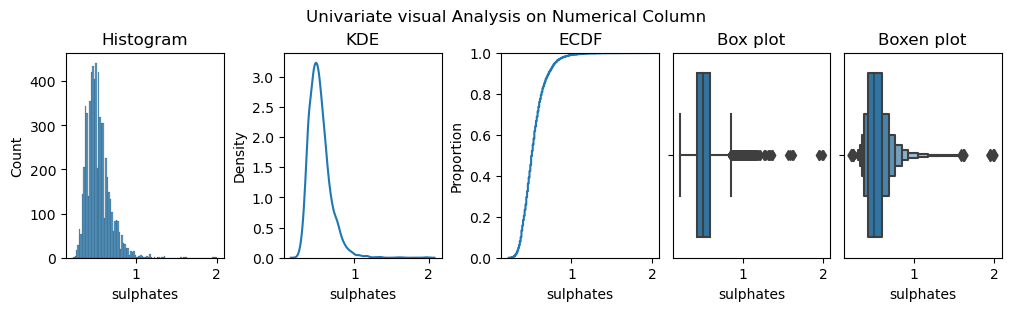

In [52]:
fig,axs = plt.subplots(1,5,figsize=(10,3),layout="constrained")
fig.suptitle("Univariate visual Analysis on Numerical Column")

axs[0].set_title("Histogram")
sns.histplot(data=df,x="sulphates",ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df,x="sulphates",ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df,x="sulphates",ax=axs[2])

axs[3].set_title("Box plot")
sns.boxplot(data=df,x="sulphates",ax=axs[3])

axs[4].set_title("Boxen plot")
sns.boxenplot(data=df,x="sulphates",ax=axs[4])

plt.show()

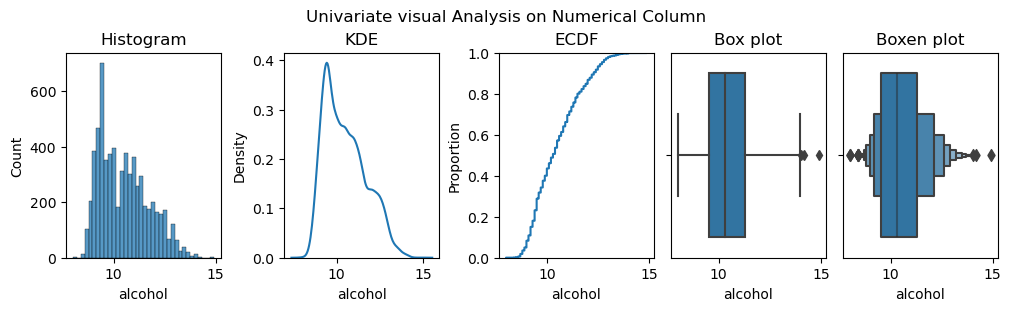

In [53]:
fig,axs = plt.subplots(1,5,figsize=(10,3),layout="constrained")
fig.suptitle("Univariate visual Analysis on Numerical Column")

axs[0].set_title("Histogram")
sns.histplot(data=df,x="alcohol",ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df,x="alcohol",ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df,x="alcohol",ax=axs[2])

axs[3].set_title("Box plot")
sns.boxplot(data=df,x="alcohol",ax=axs[3])

axs[4].set_title("Boxen plot")
sns.boxenplot(data=df,x="alcohol",ax=axs[4])

plt.show()

## Bivariate Visual Analysis

## Numerical vs Numerical column

<Axes: xlabel='alcohol', ylabel='residual_sugar'>

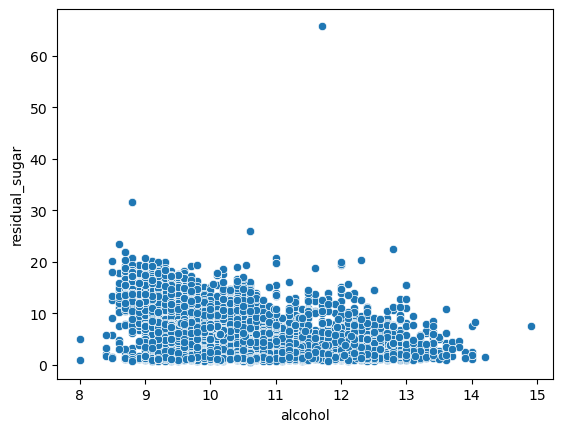

In [54]:
sns.scatterplot(data = df,x="alcohol",y="residual_sugar")

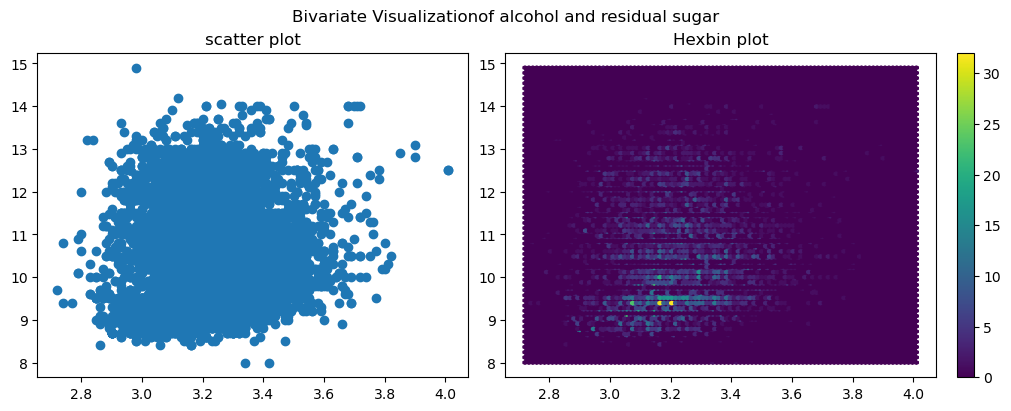

In [55]:
fig,axs=plt.subplots(1,2,figsize=(10,4),constrained_layout=True)
fig.suptitle("Bivariate Visualizationof alcohol and residual sugar")

axs[0].scatter(df["pH"],df["alcohol"])
axs[0].set_title("scatter plot")

hb1 = axs[1].hexbin(df["pH"],df["alcohol"])
axs[1].set_title("Hexbin plot")
fig.colorbar(hb1,ax=axs[1])



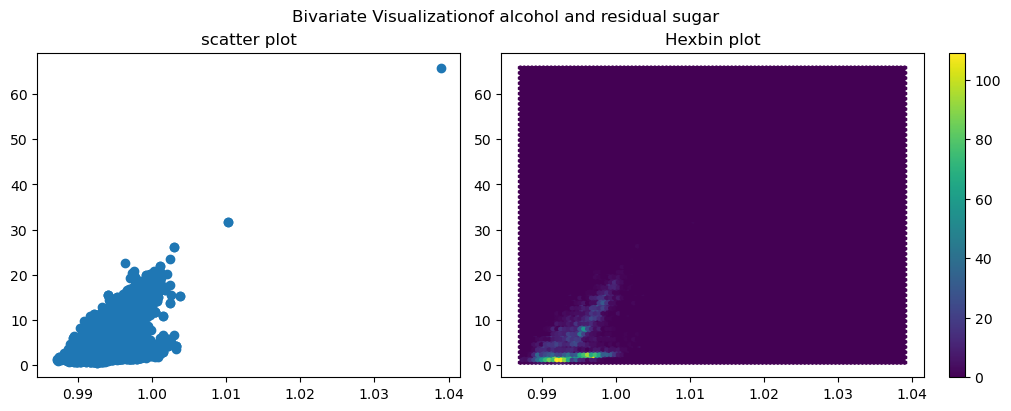

In [56]:
fig,axs=plt.subplots(1,2,figsize=(10,4),constrained_layout=True)
fig.suptitle("Bivariate Visualizationof alcohol and residual sugar")

axs[0].scatter(df["density"],df["residual_sugar"])
axs[0].set_title("scatter plot")

hb1 = axs[1].hexbin(df["density"],df["residual_sugar"])
axs[1].set_title("Hexbin plot")
fig.colorbar(hb1,ax=axs[1])



<Axes: xlabel='density', ylabel='residual_sugar'>

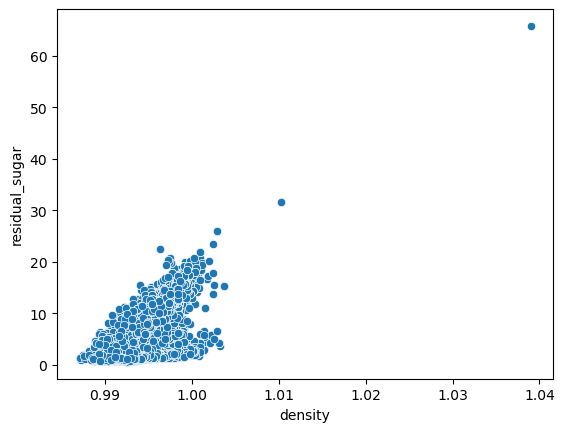

In [57]:
sns.scatterplot(data = df, x="density",y="residual_sugar")

<Axes: >

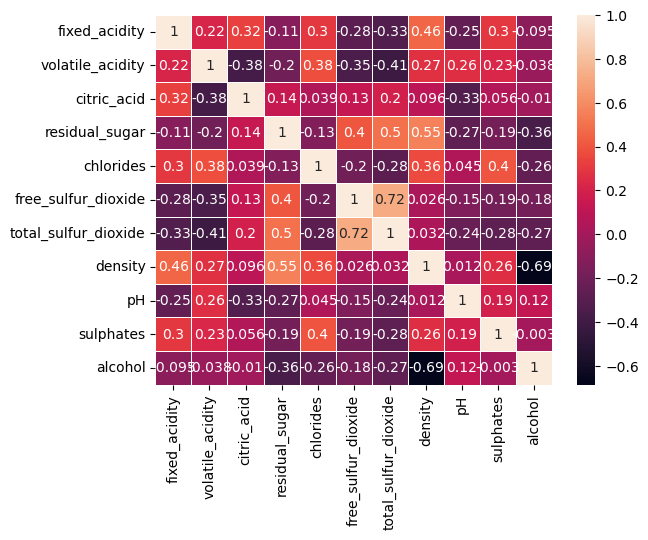

In [58]:

sns.heatmap(df.select_dtypes(include=["float64"]).corr(),annot=True,linewidth=0.5)

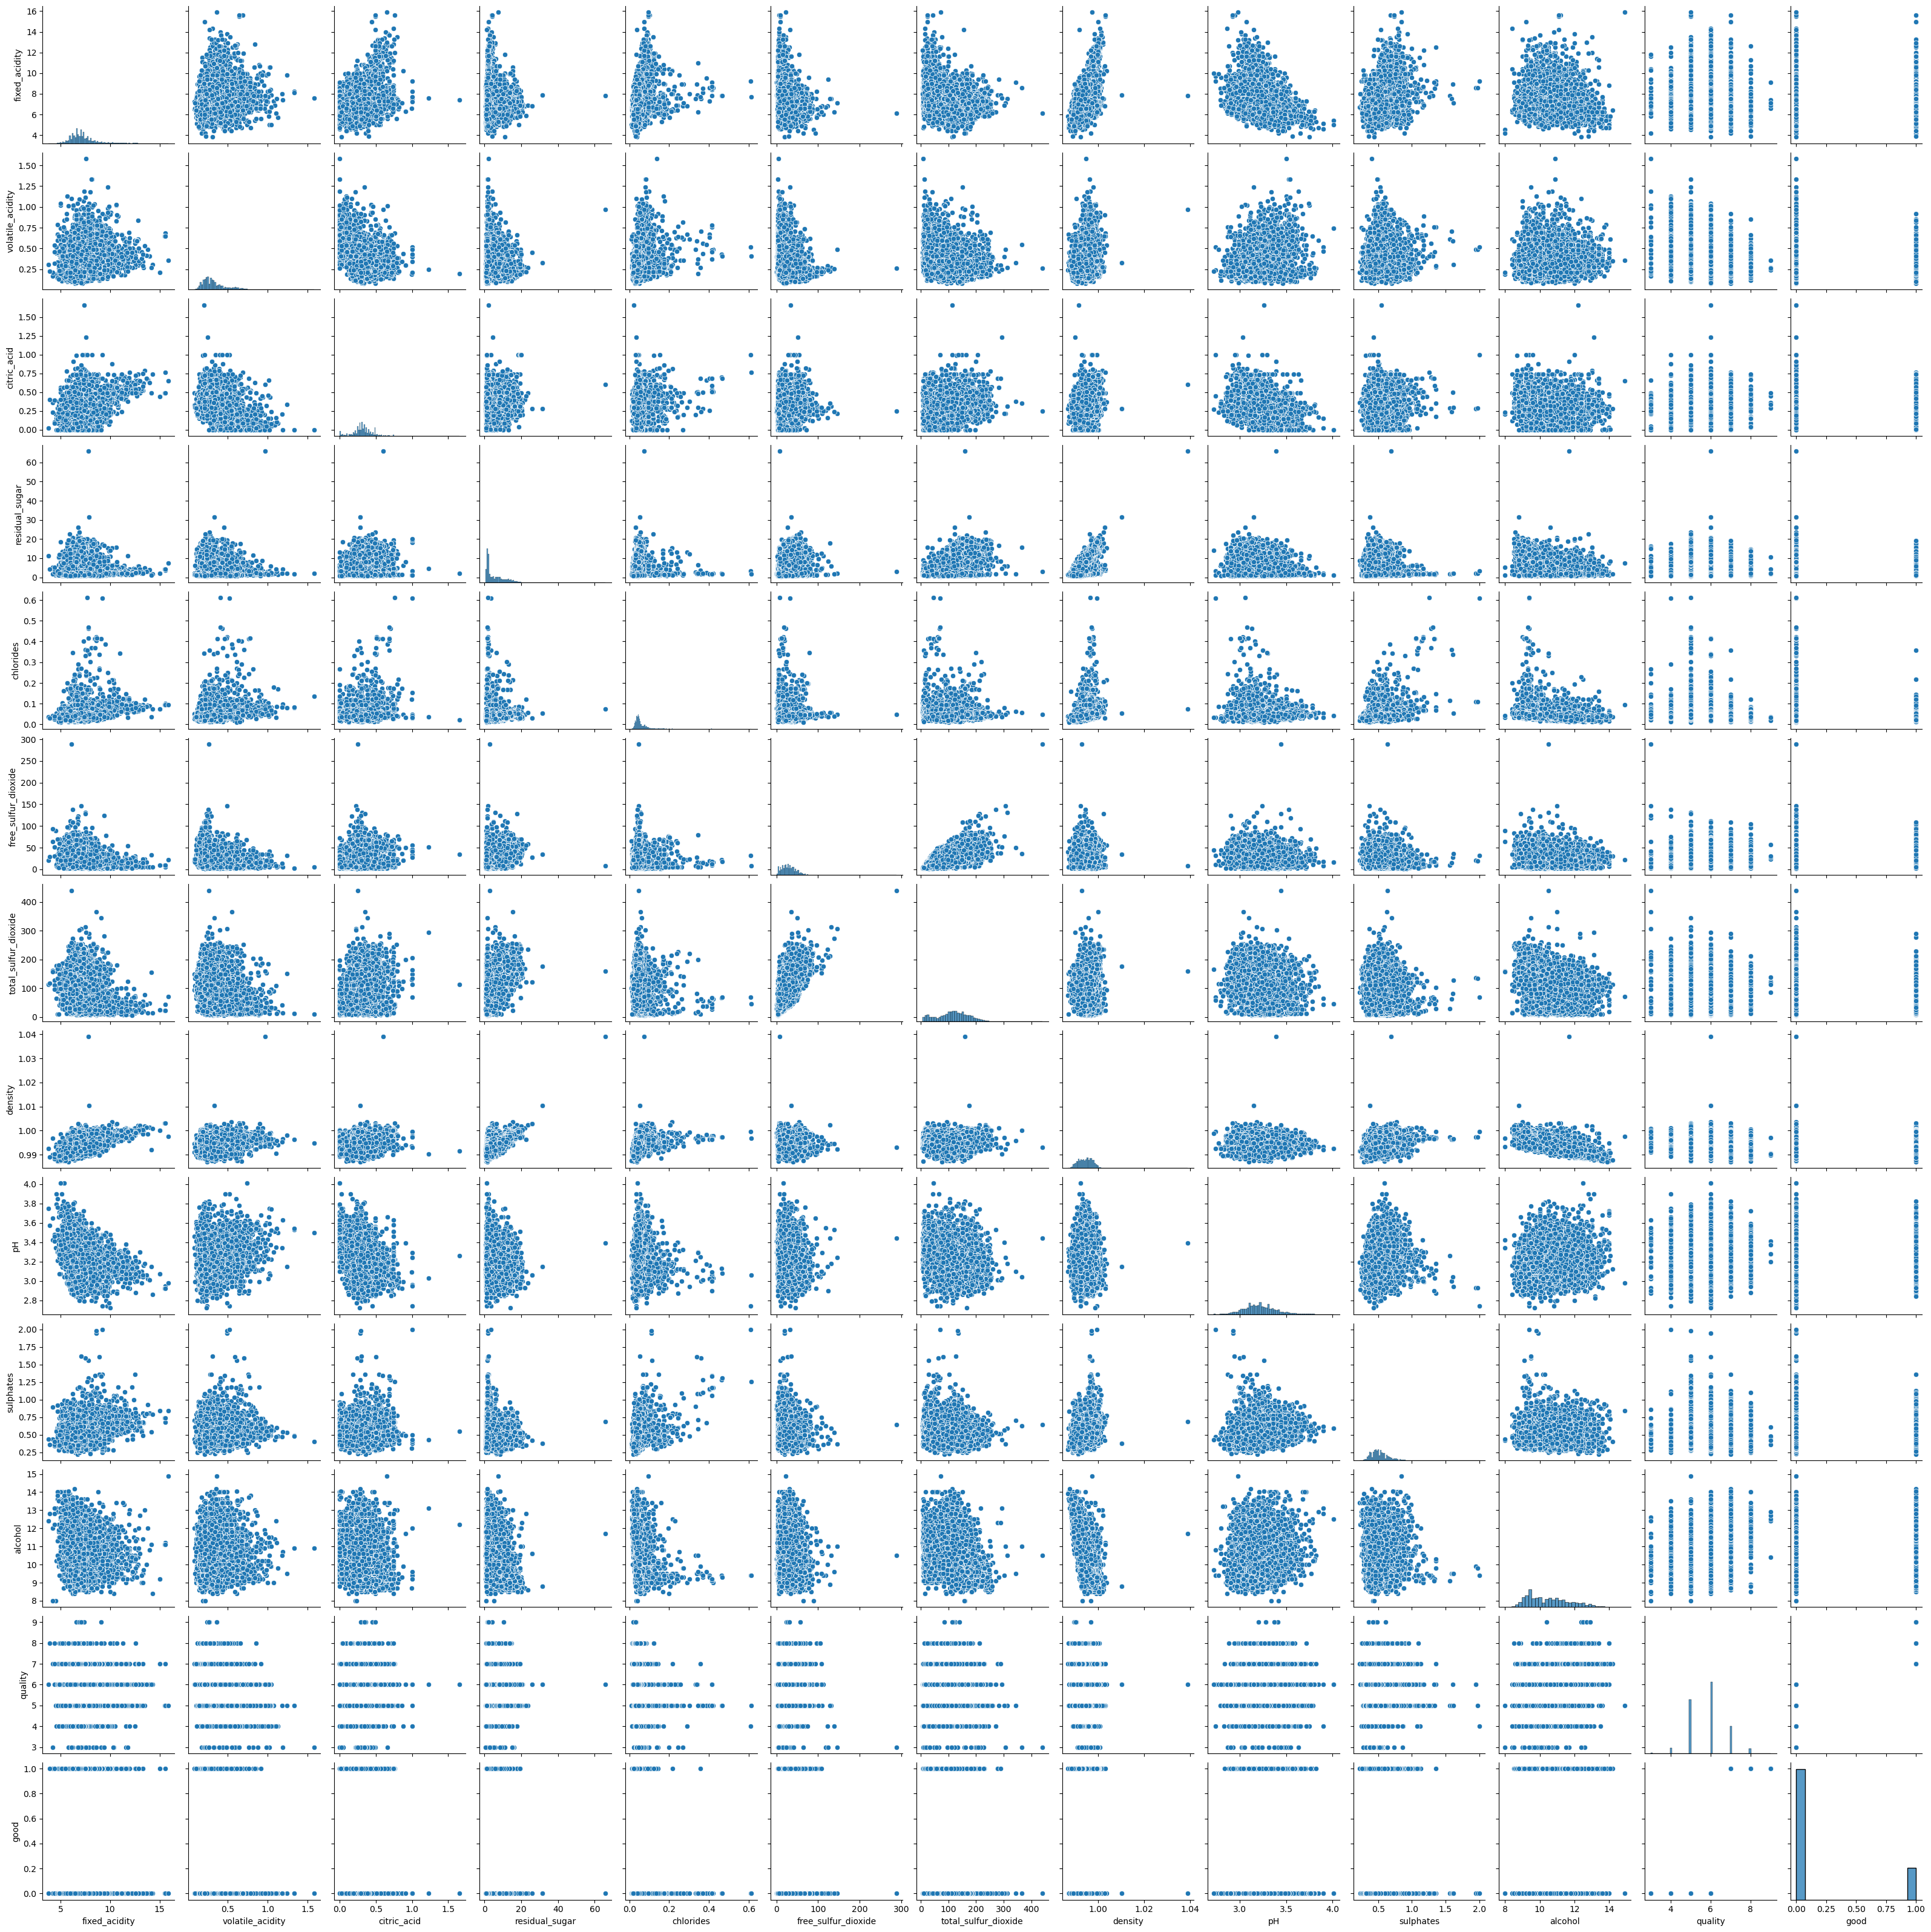

In [59]:
sns.pairplot(df)

## Numerical vs catagorical column

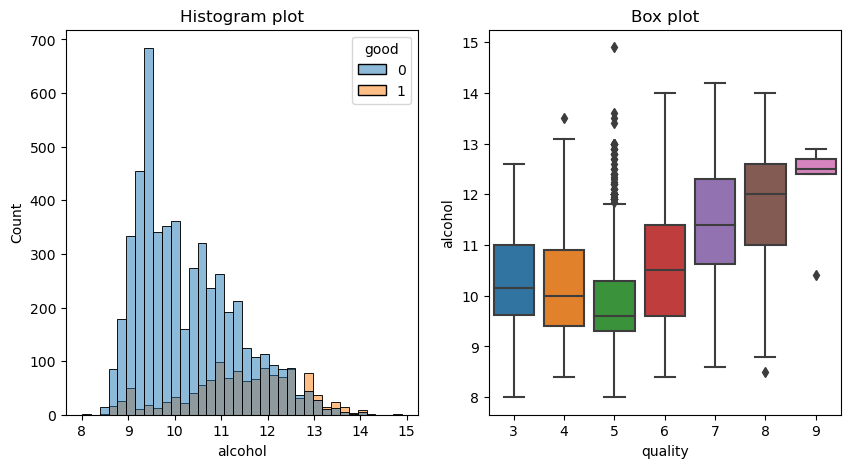

In [60]:
fig,axs =plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="alcohol",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y = "alcohol",ax=axs[1])

plt.show()

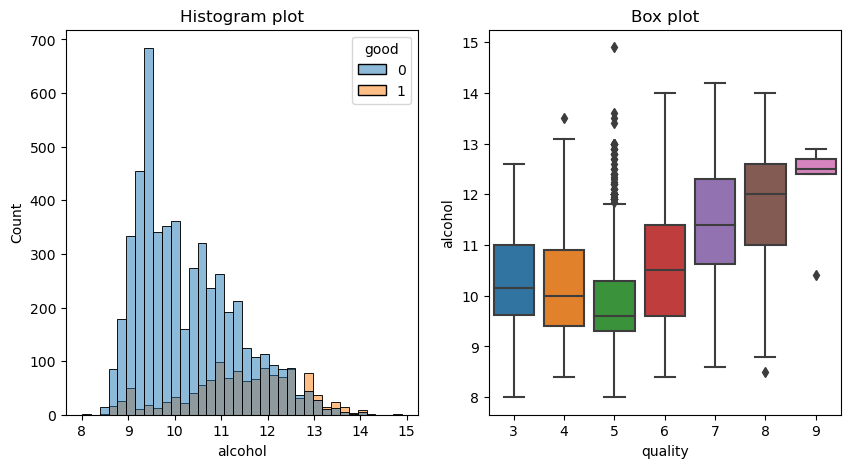

In [61]:
fig,axs =plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="alcohol",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y = "alcohol",ax=axs[1])

plt.show()

In [62]:
df = df.loc[df["alcohol"]>9.4]
df=df.loc[df["alcohol"]<11]

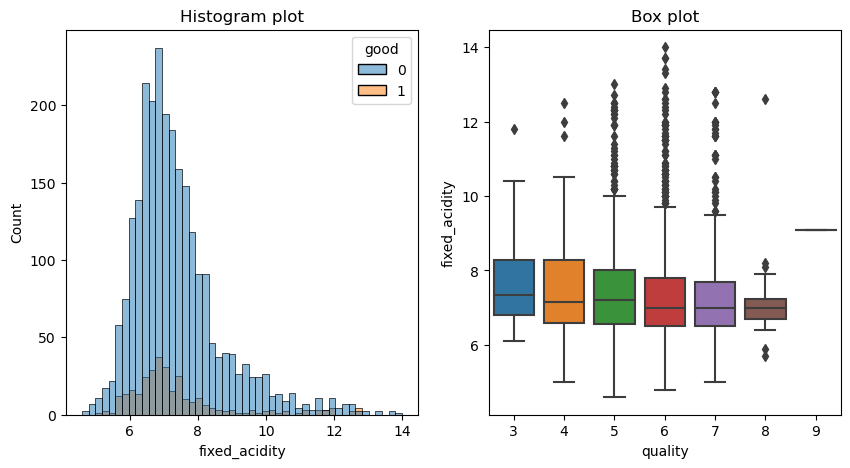

In [63]:
fig,axs =plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="fixed_acidity",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y = "fixed_acidity",ax=axs[1])

plt.show()

In [64]:
df = df.loc[df["fixed_acidity"]<8.2]
df = df.loc[df["fixed_acidity"]>5]

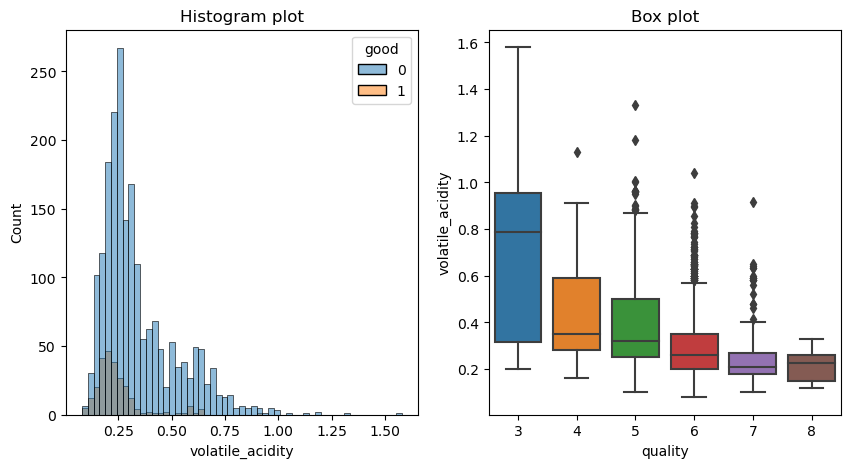

In [65]:
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="volatile_acidity",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y = "volatile_acidity",ax=axs[1])

plt.show()

In [66]:
df = df.loc[df["volatile_acidity"]<0.2]
df = df.loc[df["volatile_acidity"]>0.11]

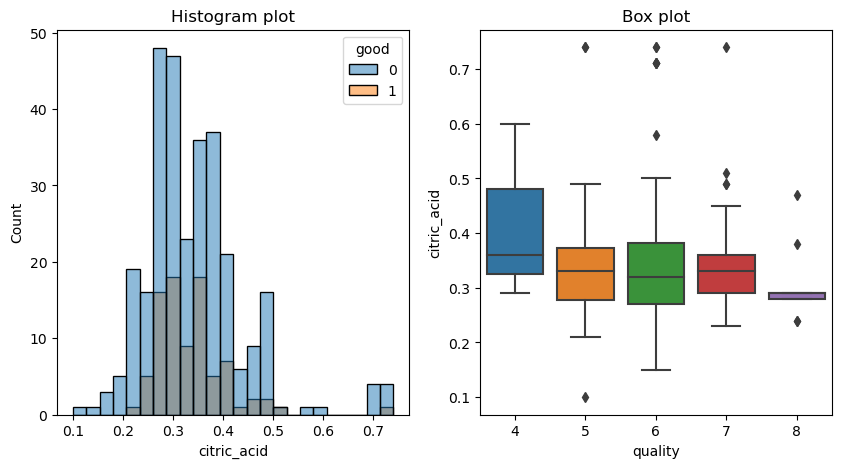

In [67]:
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="citric_acid",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y = "citric_acid",ax=axs[1])

plt.show()

In [68]:
df= df.loc[df["citric_acid"]<0.45]
df=df.loc[df["citric_acid"]>0.15]

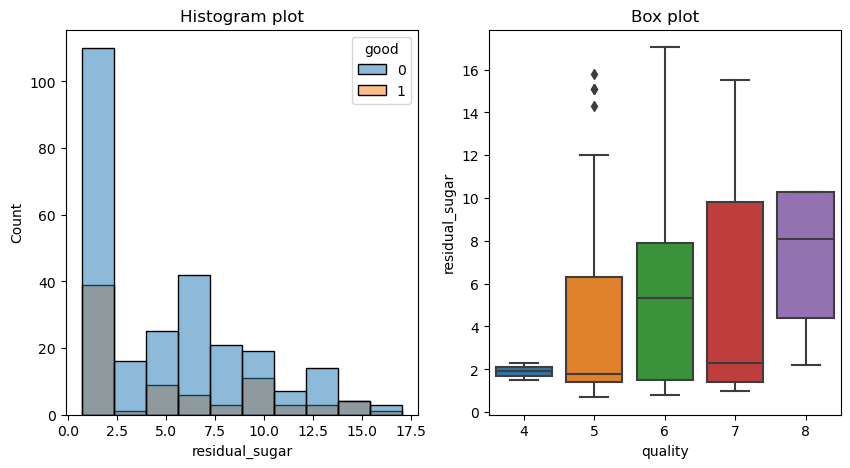

In [69]:
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="residual_sugar",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y = "residual_sugar",ax=axs[1])

plt.show()

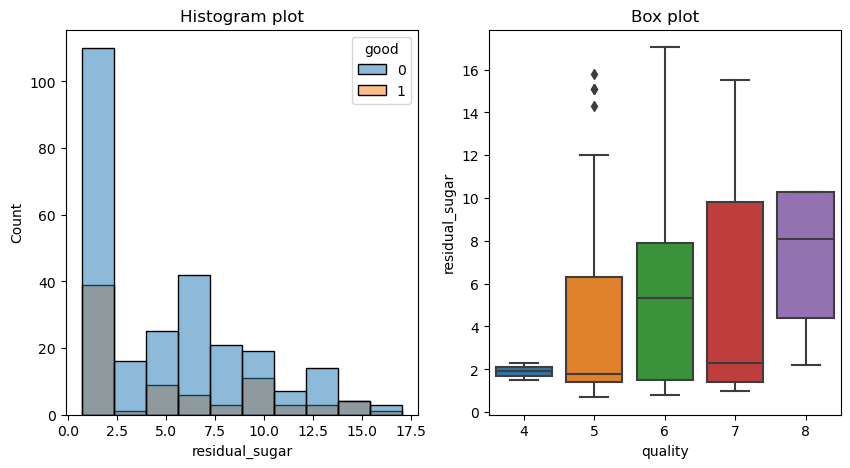

In [70]:
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="residual_sugar",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y = "residual_sugar",ax=axs[1])

plt.show()

In [71]:
df = df.loc[df["residual_sugar"]<9]

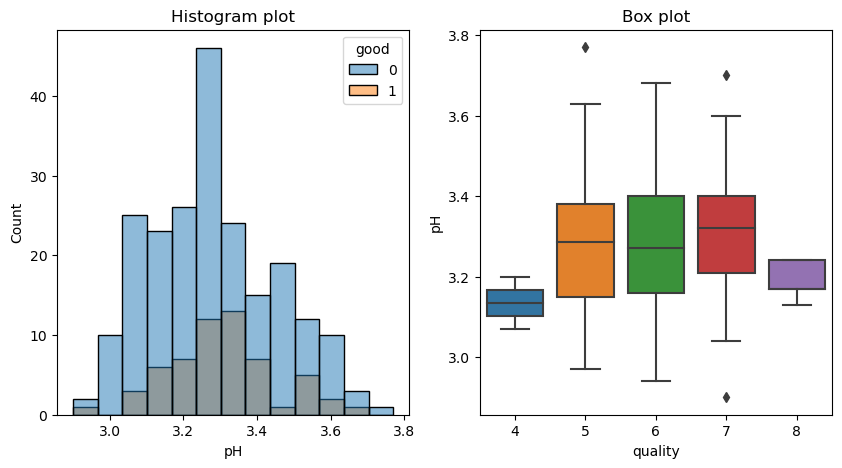

In [72]:
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="pH",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y = "pH",ax=axs[1])

plt.show()

In [73]:
df =df.loc[df["pH"]<3.6]
df=df.loc[df["pH"]>2.8]

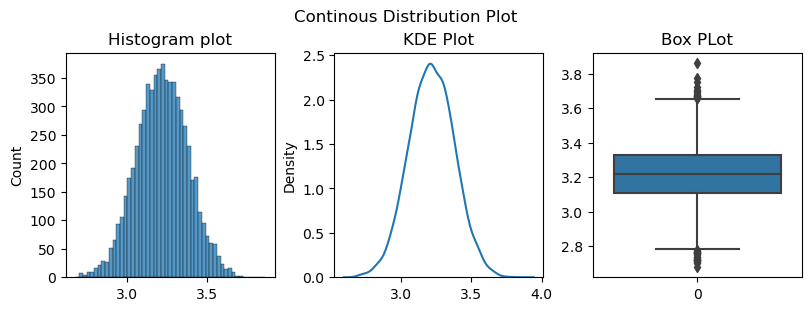

In [74]:
def normal_distribution_generator(mean, std, size):
    return np.random.normal(loc=mean, scale=std, size=size)


normal_dist = normal_distribution_generator(mean=3.218, std=0.160, size=6497)

continous_distribution_plot(data=normal_dist)

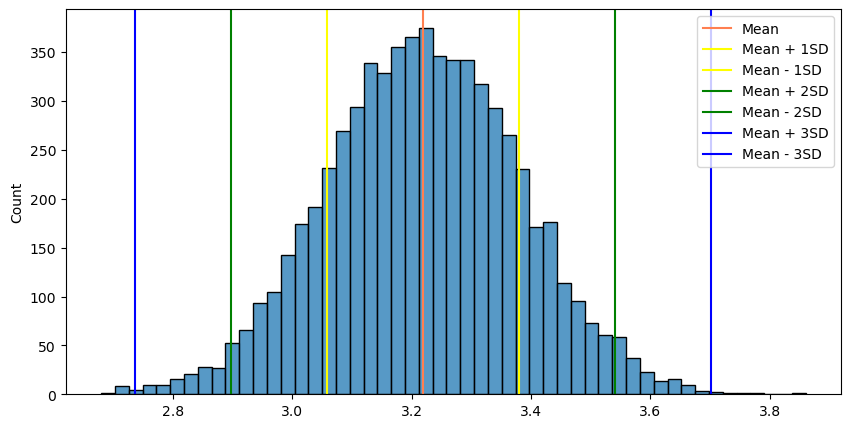

In [75]:
plt.figure(figsize=(10,5))

sns.histplot(normal_dist)


plt.axvline(normal_dist.mean(), color='coral', label='Mean')

plt.axvline(normal_dist.mean() + (1 * normal_dist.std()), color='yellow', label='Mean + 1SD')
plt.axvline(normal_dist.mean() - (1 * normal_dist.std()), color='yellow', label='Mean - 1SD')
plt.axvline(normal_dist.mean() + (2 * normal_dist.std()), color='green', label='Mean + 2SD')
plt.axvline(normal_dist.mean() - (2 * normal_dist.std()), color='green', label='Mean - 2SD')
plt.axvline(normal_dist.mean() + (3 * normal_dist.std()), color='blue', label='Mean + 3SD')
plt.axvline(normal_dist.mean() - (3 * normal_dist.std()), color='blue', label='Mean - 3SD')

plt.legend()

plt.show()

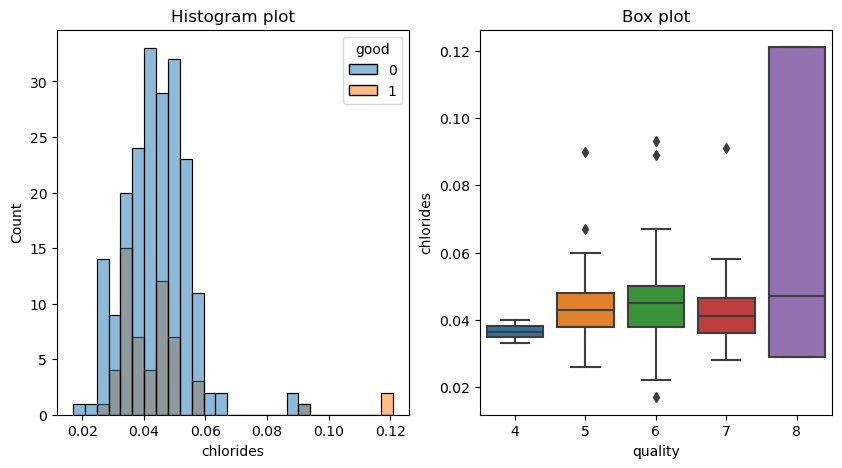

In [76]:
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="chlorides",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y = "chlorides",ax=axs[1])

plt.show()

In [77]:
df = df.loc[df["chlorides"]<0.060]
df = df.loc[df["chlorides"]>0.023]

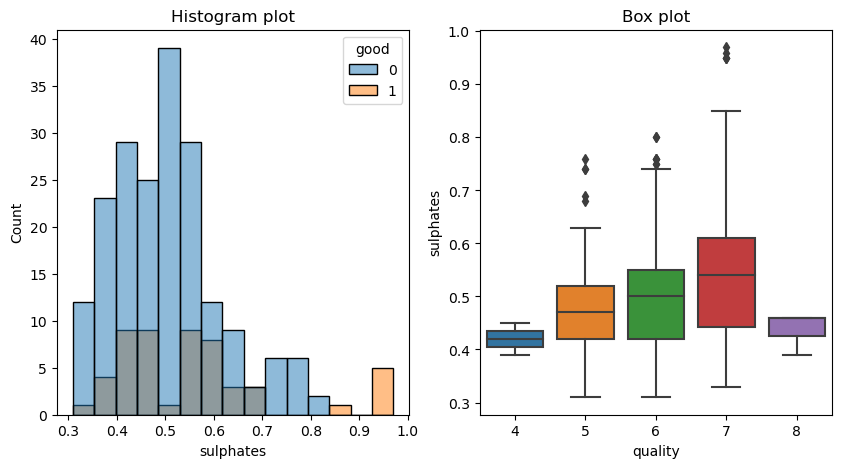

In [78]:
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="sulphates",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y = "sulphates",ax=axs[1])

plt.show()

In [79]:
df = df.loc[df["sulphates"]<0.7]

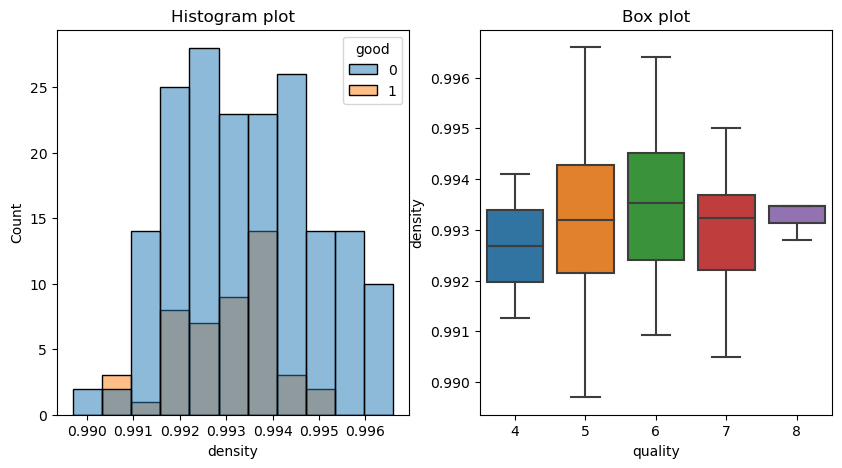

In [80]:
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="density",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y = "density",ax=axs[1])

plt.show()

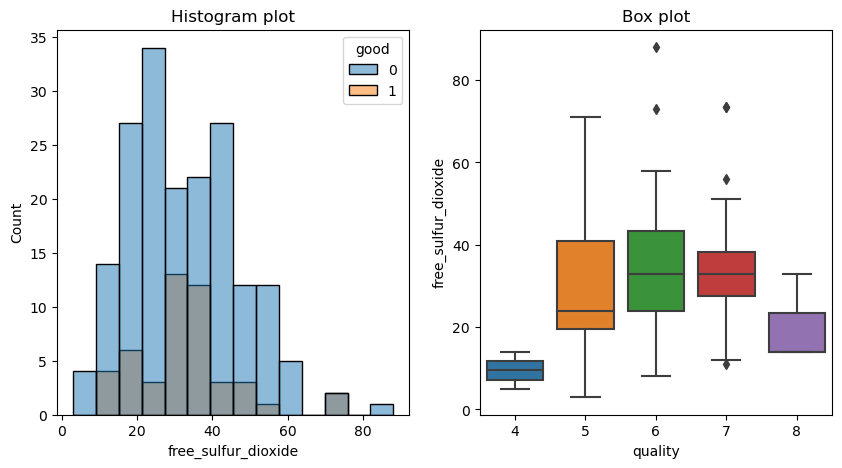

In [81]:
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="free_sulfur_dioxide",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y = "free_sulfur_dioxide",ax=axs[1])

plt.show()

In [82]:
df = df.loc[df["free_sulfur_dioxide"]<65]

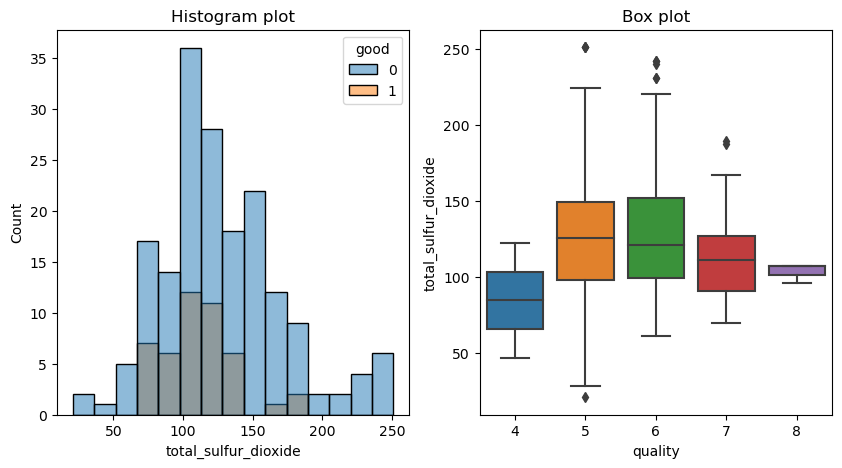

In [83]:
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="total_sulfur_dioxide",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y ="total_sulfur_dioxide",ax=axs[1])

plt.show()

In [84]:
df = df.loc[df["total_sulfur_dioxide"]<170]
df = df.loc[df["total_sulfur_dioxide"]>40]

<Axes: xlabel='quality', ylabel='pH'>

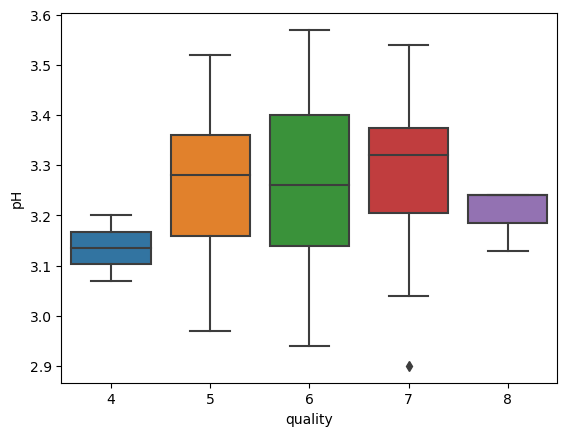

In [85]:
sns.boxplot(data=df,x="quality",y  = "pH")

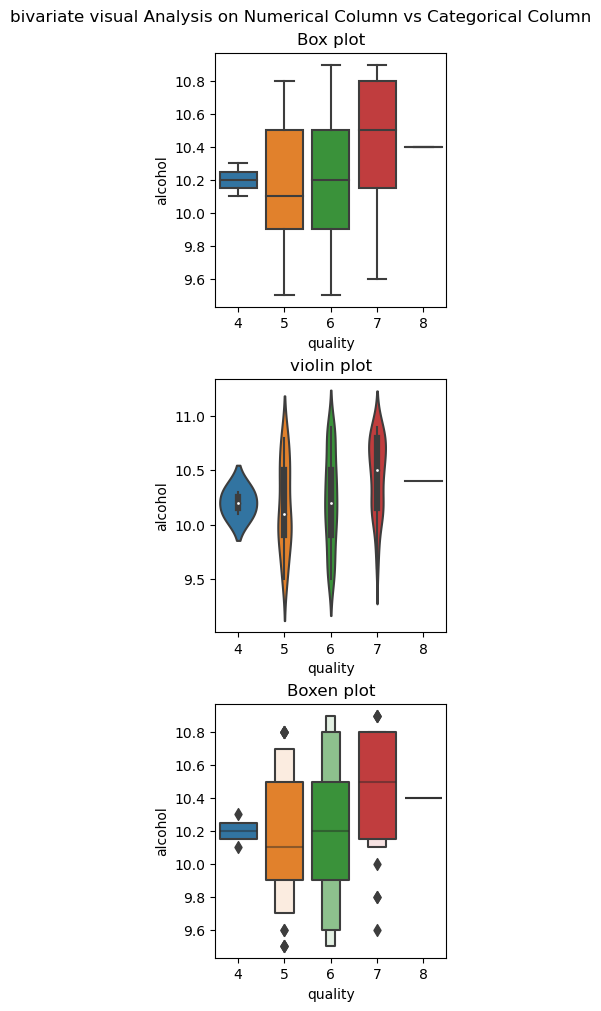

In [86]:
fig,axs = plt.subplots(3,1,figsize=(3,10),layout="constrained")
fig.suptitle("bivariate visual Analysis on Numerical Column vs Categorical Column")

axs[0].set_title("Box plot")
sns.boxplot(data=df,x="quality",y="alcohol",ax=axs[0])

axs[1].set_title("violin plot")
sns.violinplot(data=df,x="quality",y="alcohol",ax=axs[1])

axs[2].set_title("Boxen plot")
sns.boxenplot(data=df,x="quality",y="alcohol",ax=axs[2])

plt.show()

## Categorical column vs Categorical column

#### Quality vs good

<Axes: ylabel='quality'>

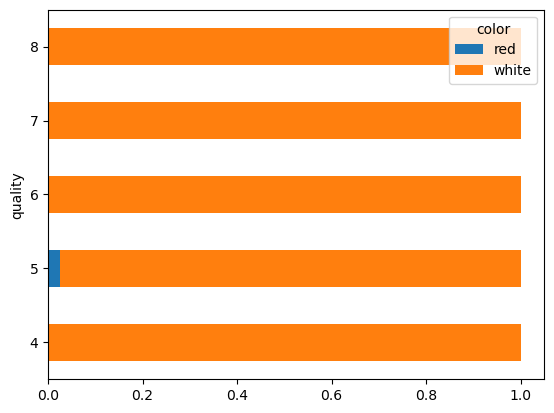

In [87]:
crossbar = pd.crosstab(df["quality"],df["color"],normalize="index")
crossbar.plot(kind="barh",stacked = True)

<Axes: ylabel='quality'>

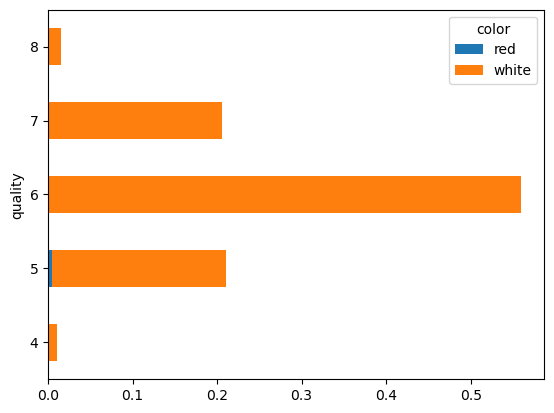

In [88]:
crossbar = pd.crosstab(df["quality"],df["color"],normalize=True)
crossbar.plot(kind="barh",stacked = True)

<Axes: ylabel='quality'>

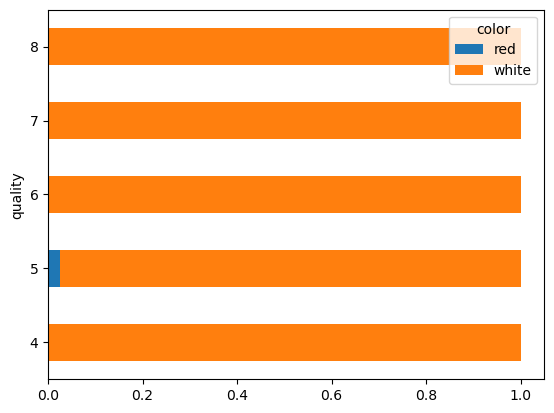

In [89]:
crossbar = pd.crosstab(df["quality"],df["color"],normalize="index")
crossbar.plot(kind="barh",stacked = True)